# 1. 데이터 로드, 데이터 분석

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('df.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
len(dataset)

62389

In [4]:
dataset.drop(columns='index', inplace=True)

In [5]:
dataset

,Store_name,Review,Rank,Label
0,두껍다회선생,평소 두꺼운 회를 별로 안 좋아해서 고민하다가 후기 좋길래 가봤는데 후회 없었음. ...,5.0,1
1,두껍다회선생,숙성회맛있ㅅ어요 💕 다만 반반이라는데.. 연어가 \n더 많네요오 ㅠㅠ 연어가 단가가...,4.0,1
2,두껍다회선생,남자 사장님친절하세요\n여자분은별로...,4.5,1
3,두껍다회선생,근처에 들렸다가 밥 먹을때가 안보여서 들어갔어요 가격도 괜찮고 회도 맛있고 깔끔하니...,4.0,1
4,두껍다회선생,맛잇어요 존득하고\n활어회보다 저는 이게 더 맛잇는것같아용,5.0,1
...,...,...,...,...
62384,더참치,"사장님 부부께서는 참 친절하신데 35,000원짜리를 두명에서 먹을땐 호계치고 그냥저...",3.0,0
62385,더참치,엄마 생신이라 평소 가던곳 아닌 더참치 처음 갔어요 . 41만원나왔고. 1인 열점먹...,0.5,0
62386,더참치,참치 맛이 조~~~금 비리대요,4.0,1
62387,일품,물회맛있어요~\n매운탕도 같이줘서 굿굿,4.5,1


In [14]:
# 훈련데이터와 테스트데이터 분리
data = dataset['Review']
target = dataset['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=24)

In [15]:
print('총 X 훈련 샘플의 수 : ', len(x_train))
print('총 y 훈련 샘플의 수 : ', len(y_train))
print('총 X 테스트 샘플의 수 : ', len(x_test))
print('총 y 테스트 샘플의 수 : ', len(y_test))

총 X 훈련 샘플의 수 :  49911
총 y 훈련 샘플의 수 :  49911
총 X 테스트 샘플의 수 :  12478
총 y 테스트 샘플의 수 :  12478


<AxesSubplot:>

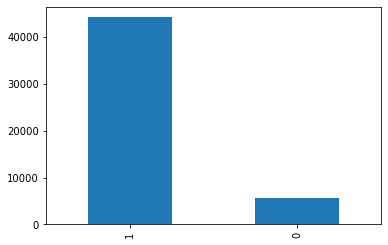

In [16]:
y_train.value_counts().plot(kind = 'bar')

# 2. BERT - FineTuning(Sentence analasis)
## 2-1. 정수 인코딩

In [17]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [18]:
X_train_list = x_train.tolist()
X_test_list = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [19]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [20]:
print(X_train[0].tokens)

['[CLS]', '대하', '##구이', '##는', '언제나', '진리', '##죠', '토', '##실', '##토', '##실', '너무', '[UNK]', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [21]:
print(X_train[0].ids)

[2, 5081, 19125, 2259, 5641, 6960, 2321, 1793, 2477, 2386, 2477, 3760, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 2-2. 데이터셋 생성 및 모델 학습

In [24]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [25]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [27]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x000001869B93EFA0>>

In [31]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(4000).batch(16), epochs=4, batch_size=32,
    validation_data = val_dataset.shuffle(4000).batch(16),
    callbacks = [callback_earlystop]
)

Epoch 1/4
3120/3120 [==============================] - 2133s 684ms/step - loss: 0.0884 - accuracy: 0.9693 - val_loss: 0.1682 - val_accuracy: 0.9402
Epoch 2/4
3120/3120 [==============================] - 2047s 656ms/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.1952 - val_accuracy: 0.9392
Epoch 3/4
3120/3120 [==============================] - 1987s 637ms/step - loss: 0.1739 - accuracy: 0.9411 - val_loss: 0.3569 - val_accuracy: 0.8850


In [32]:
model.evaluate(val_dataset.batch(512))

25/25 [==============================] - 112s 4s/step - loss: 0.3569 - accuracy: 0.8850


[0.35685911774635315, 0.8849976062774658]

In [33]:
model.save_pretrained('BERT_model/bert-base')
tokenizer.save_pretrained('BERT_model/bert-base')

('BERT_model/bert-base\\tokenizer_config.json',
 'BERT_model/bert-base\\special_tokens_map.json',
 'BERT_model/bert-base\\vocab.txt',
 'BERT_model/bert-base\\added_tokens.json',
 'BERT_model/bert-base\\tokenizer.json')

In [34]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('BERT_model/bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('BERT_model/bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at BERT_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at BERT_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
C:\Users\DanielJeong\AppData\Roaming\Python\Python39\site-packages\tr

## 2-3. 모델 테스트

In [35]:
def show_sentiment(text):
    result = text_classifier(text)[0]
    print('부정일 확률 : ', round(result[0]['score'],3))
    print('긍정일 확률 : ', round(result[1]['score'],3))

In [36]:
text_classifier('위생상태 불량')[0]

[{'label': 'LABEL_0', 'score': 0.1167651116847992},
 {'label': 'LABEL_1', 'score': 0.8832348585128784}]

In [37]:
show_sentiment('위생불량')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [38]:
show_sentiment('장소가 협소하네요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [39]:
show_sentiment('비린맛이 심하네요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [40]:
show_sentiment('맛은 좋지만 가성비가 떨어지네요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [41]:
show_sentiment('알바가 친절하고 맛도 좋아요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [42]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [43]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요. 그런데 주차자리가 협소하네요')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [44]:
show_sentiment('굿')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [45]:
show_sentiment('개 좋다')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [46]:
show_sentiment('개 같다')

부정일 확률 :  0.117
긍정일 확률 :  0.883


In [47]:
show_sentiment('장사가 잘되니 초심을 잃었네요')

부정일 확률 :  0.117
긍정일 확률 :  0.883
